# Intro 
This notebook is an introduction to `SageMath` basics for Econ 307. And thats how the document is organized:
1. Basics such as defininig a `function`, `ploting a function`, `differentiation`, `solving equations` 
2. Applying what you learnt in part 1 to an economic problem

In [1]:
from matplotlib import rc  #ignore this

# Section 1

## 1.a) Defining a function
Consider these three function 
1. $f_1(x) = x$
2. $f_2(x) = 2x- x^2$
3. $f_3(x) = exp(-x)$

In [2]:
f_1(x) = x #linear function
f_2(x) = 2*x - x^2 #quadratic function
f_3(x) = exp(-x) #exponential function
f_4(x) = sin(10*x^2)*exp(-x) # A cute function that you dont see in economics and you dont need to know anything about it 


## 1.b) Plotting a function
If you want to plot `a` function you can do the following (here $f_3$ as an example)

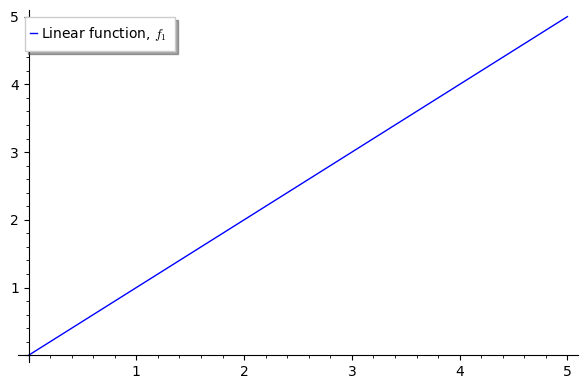

In [3]:
plot(f_1, (x,0,5), legend_label='Linear function, $f_1$')

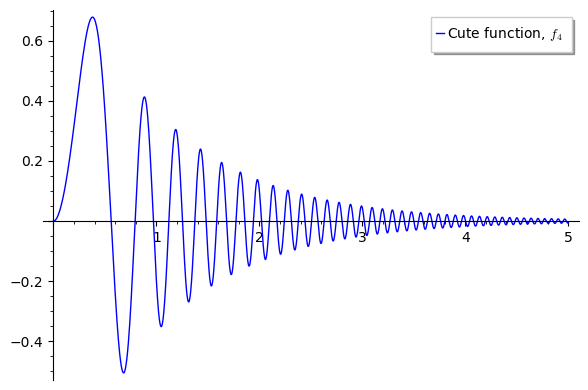

In [4]:
plot(f_4, (x,0,5), legend_label='Cute function, $f_4$')

What if you want to plot more than one functions, in one plot?

you can name them and use `+` 

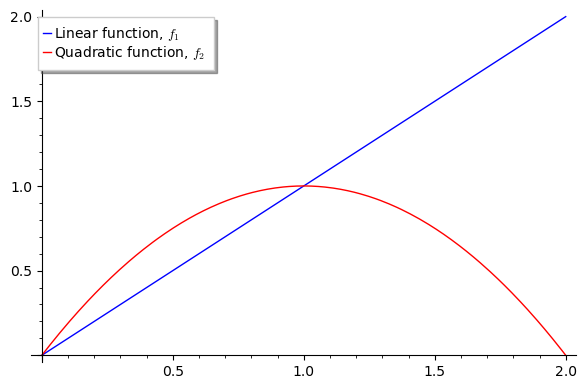

In [5]:
p_linear = plot(f_1, (x,0,2), legend_label='Linear function, $f_1$', color='blue')
p_quadratic = plot(f_2, (x,0,2), legend_label='Quadratic function, $f_2$', color = 'red')
p_linear + p_quadratic

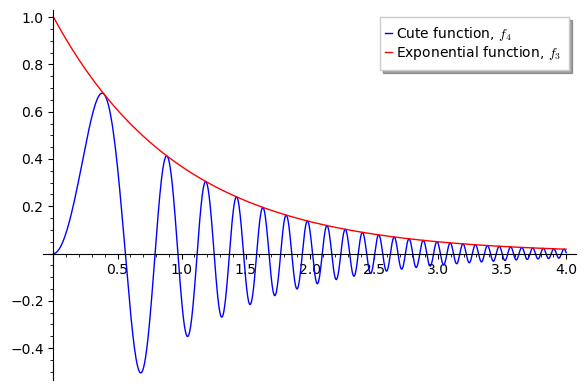

In [6]:
p_cute = plot(f_4, (x,0,4), legend_label='Cute function, $f_4$', color='blue')
p_exponential = plot(f_3, (x,0,4), legend_label='Exponential function, $f_3$', color = 'red')
p_cute + p_exponential

## 1.c.1) Differentiation
Consider the following function

$g(x) = x^2+2x+1 $ and we want to calculate the derivative of this function, i.e. $\frac{dg}{dx}=g'(x)$.

You can use the command `diff` 

In [7]:
g(x) = x^2+2*x+1

In [8]:
diff(g(x),x) #this calculates dg(x)/dx

2*x + 2

lets define  $\frac{dg}{dx}$ as a new function

In [9]:
g_prime(x) = diff(g(x),x)

you can claculate it at different values for example $g'(2) = 6$

In [10]:
g_prime(2)

6

you can also plot these

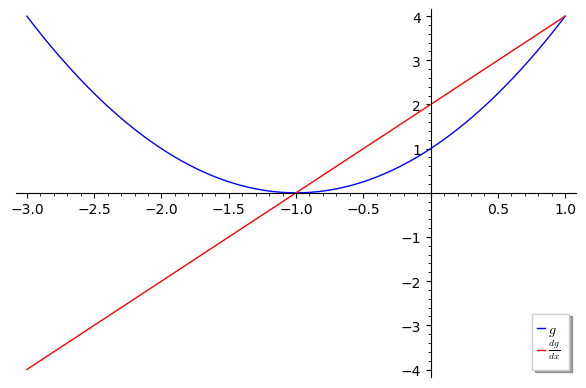

In [11]:
p_g = plot(g, (x,-3,1), legend_label='$g$', color='blue')
p_g_prime = plot(g_prime, (x,-3,1), legend_label=r'$\frac{dg}{dx}$', color = 'red')
p_g + p_g_prime

## 1.c.2) Partial Differentiation
Now the question is what happens if I have a function like $h(x,y)$ and I want to calculate $\frac{\partial h}{\partial x}$ and $\frac{\partial h}{\partial y}$? You can still use `diff` function as follows

`diff(h(x,y),x)` calculates $\frac{\partial h(x,y)}{\partial x}$ and 

`diff(h(x,y),y)` calculates $\frac{\partial h(x,y)}{\partial y}$


As an example let $h(x,y) = 2x^2+2xy+y^2$

In [12]:
h(x,y) = (2*x^2)+(2*x*y)+(y^2)

In [13]:
diff(h(x,y),x) 

4*x + 2*y

In [14]:
diff(h(x,y),y)

2*x + 2*y

now lets define them as a function, i.e 

$h_x = \frac{\partial h}{\partial x}$, and $h_y = \frac{\partial h}{\partial x}$

In [15]:
h_x(x,y) = diff(h(x,y),x)
h_x(1,1)

6

In [16]:
h_y(x,y) = diff(h(x,y),y)
h_y(1,1)

4

## 1.d) Solving equations (root finding)
Let's say we want to solve $F(x) = 0$, where $x \in \mathbb{R}$. i.e. you want to find $x^*$ (not neccesarily unique), such that 

$F(x^*) = 0$

Let $F(x) = x^2 - 1 $

In [17]:
F(x) = x^2 -1

In [18]:
solve(F, x)

[x == -1, x == 1]

What if you want to solve something like 

$G(x) = x^2-a$.

you have two options:

1. defining `a` as a variable 

In [19]:
var('a') #defining that a is a variable 
G(x) = x^2 - a

In [20]:
solve(G,x)

[x == -sqrt(a), x == sqrt(a)]

2. Defining `G` as a two variable function, i.e.

$G_1(x,a) = x^2- a$

In [21]:
G_1(x,a) = x^2 - a

In [22]:
solve(G_1,x)

[x == -sqrt(a), x == sqrt(a)]

# Section 2 
In this section we solve the Price of Anarchy example where we use the things we learnt in Section 1. The main file, can be found here:
[Price of Anarchy](https://github.com/michaelpetersubc/notebooks/blob/master/Econ306/price_of_anarchy/306_anarchy.ipynb)

For example you want to solve an equation of the following form:

$\frac{\pi}{2}+(1-\pi) = \pi \beta + (1-\pi)\frac{\beta}{2}$

This is equivalent of solving 

$\frac{\pi}{2}+(1-\pi) - \pi \beta - (1-\pi)\frac{\beta}{2} = 0$

so lets define a function called `equil` as follows

$equil(\pi,\beta) = \frac{\pi}{2}+(1-\pi) - \pi \beta - (1-\pi)\frac{\beta}{2}$ and find a $\pi^*$, such that 

$equil(\pi^*,\beta) = 0$

In [23]:
equil(π,β) = (π/2) + (1-π) - (π*β) - (1-π)*(β/2)

How do I make sure I didint make a mistake in defining `equil` function? SageMath has an option that types up your expression in latex form. Use `show(latex(equil))`

In [24]:
show(latex(equil))

\left( π, β \right) \ {\mapsto} \ \frac{1}{2} \, β {\left(π - 1\right)} - β π - \frac{1}{2} \, π + 1

now lets find $\pi^*$

In [25]:
solve(equil,π)

[π == -(β - 2)/(β + 1)]

what `solve(equil,π)` spits out is a bit ugly, so lets use `show` command

In [26]:
show(solve(equil,π))

[π == -(β - 2)/(β + 1)]

Now lets say you want to study a function of the form (why do we want to study thie? read the document Dr. Peters sent you):

$\pi^2+ 2(1-\pi)\pi(1+\beta)+(1-\pi)^2 \beta$

Lets define a function called `num_pack`

In [27]:
num_pack(π,β) = π^2 + 2*(1-π)*π*(1+β) + β*(1-π)^2  

In [28]:
show(latex(num_pack))

\left( π, β \right) \ {\mapsto} \ β {\left(π - 1\right)}^{2} - 2 \, {\left(β + 1\right)} {\left(π - 1\right)} π + π^{2}

Now if you want to see how this function look like as $\pi$ changes, but note `num_pack` is also a function of $\beta$, so it is a two dimensional function. Lets give look at the function at a specific value of $\beta$, lets say $\beta = 4/5$. For that you can use command `.substitute`

In [29]:
num_pack_spec(π) = num_pack(π,β).substitute(β = 4/5)

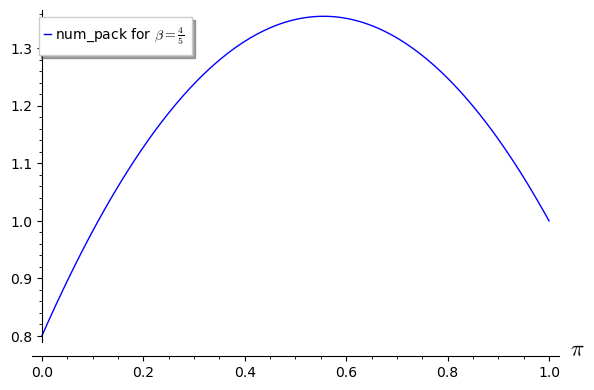

In [30]:
plot(num_pack_spec,(π,0,1),legend_label=r'num_pack for $\beta = \frac{4}{5}$',axes_labels=[r'$\pi$',''])

If you look at the graph above you see it has a maximum, how do we find it?
Remember you use first order condition, i.e. you need a point that solves

$\frac{d ~ \text{num_pack}(\pi,\beta = \frac{4}{5})}{d \pi} = 0$. So lets calulate the derivative of `num_pack` with respect to $\pi$ when $\beta = \frac{4}{5}$


In [31]:
num_pack_π(π,β) = diff(num_pack(π,β),π)

lets see how it looks like:

In [32]:
show(latex(num_pack_π))

\left( π, β \right) \ {\mapsto} \ -2 \, {\left(β + 1\right)} {\left(π - 1\right)} + 2 \, β {\left(π - 1\right)} - 2 \, {\left(β + 1\right)} π + 2 \, π

now lets find the maximum when $\beta = \frac{4}{5}$

In [33]:
solve(num_pack_π(π,4/5),π) #this is going to look ugly

[π == (5/9)]

In [34]:
show(solve(num_pack_π(π,4/5),π))

[π == (5/9)]